# PyTorch - Vortrag
### HTW Berlin - Angewandte Informatik (B. Sc.)
#### Modul "Ausgewählte Kapitel sozialer Webtechnologien" (aka Neuronale Netze)

##### Diletta Calussi - s0559842

# Inhalte

1. Das Framework PyTorch
2. PyTorch Fundamentals: Tensors, NumPy Bridge, Variablen, Autograd und CUDA
3. Neuronale Netze in PyTorch
5. Quellen

## 1. Das Framework [PyTorch](https://pytorch.org/)

- Eine ML Open-Source-Bibliothek für python
- Basiert auf der in [**Lua**](https://www.lua.org/) geschriebenen Bibliothek [**Torch**](http://torch.ch/)
- Vom Facebook-Forschungsteam für K.I. entwickelt 
- Erscheinungsjahr: 2016
- Unterstützt GPU sowie CPU 
- High Level


### Kurze Übersicht

1. Zwei Abstraktionen: Tensoren und Variablen
2. Dynamische Graphen (Dynamic Computational Graph)
3. Autograd-System zur Berechnung der Ableitungen 


### Packages für diese Präsentation
- torch (CUDA oder GPU)
- torchvision
- numpy



Eine Anleitung für die Installation ist auf der Webseite von [PyTorch](https://pytorch.org/) verfügbar.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Installation check
import torch
print("Torch version:", torch.__version__)
print("CUDA is active:", torch.cuda.is_available())
print("CUDA version:", torch.version.cuda)

Torch version: 0.4.0
CUDA is active: True
CUDA version: 8.0


## 2. PyTorch Fundamentals

PyTorch bietet zwei Abstraktionen für Datenstrukturen: Tensoren und Variablen. Tensoren sind so ähnlich wie NumPy-Arrays und können auch auf GPUs übertragen werden. Variablen waren bis zur Version 0.4. als Wrapper um Tensoren notwendig, um bsp. die Berechnung der Gradienten zu ermöglichen.

### 2.1 Tensoren

Ein `torch.Tensor` ist eine mehrdimensionale Matrix, die Elemente von einem bestimmten Datentyp enthält. Ein detaillierter Überblick der unterstützten Datentype ist auf der [Webseite von PyTorch](https://pytorch.org/docs/stable/tensors.html) verfügbar.  

PyTorch unterstützt sowohl GPU- als auch CPU-Tensoren.

#### Beispiele aus der [PyTorch-Webseite](https://pytorch.org/tutorials/beginner/blitz/tensor_tutorial.html#sphx-glr-beginner-blitz-tensor-tutorial-py)

In [3]:
from __future__ import print_function
import torch

#5x3 matrix, nicht initialisiert
x = torch.empty(5, 3)
print(x)

#Random-Initialisierung
x = torch.rand(5, 3)
print(x)

#Matrix filled with zeros mit Typ Long
x = torch.zeros(5, 3, dtype=torch.long)
print(x)

#Tensor aus Daten
x = torch.tensor([5.5, 3])
print(x)

x = x.new_ones(5, 3, dtype=torch.double)      # new_* methods take in sizes
print(x)

x = torch.randn_like(x, dtype=torch.float)    # override dtype!
print(x)                                      # result has the same size

print(x.size())

tensor(1.00000e-42 *
       [[ 0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000],
        [ 0.0000,  2.0571,  0.0000],
        [ 0.0000,  0.9277,  0.0000]])
tensor([[ 0.9081,  0.5446,  0.7063],
        [ 0.9432,  0.6564,  0.4187],
        [ 0.1683,  0.1023,  0.5064],
        [ 0.2705,  0.3201,  0.1988],
        [ 0.1287,  0.1389,  0.0659]])
tensor([[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]])
tensor([ 5.5000,  3.0000])
tensor([[ 1.,  1.,  1.],
        [ 1.,  1.,  1.],
        [ 1.,  1.,  1.],
        [ 1.,  1.,  1.],
        [ 1.,  1.,  1.]], dtype=torch.float64)
tensor([[-0.3100,  2.0536,  0.7021],
        [-0.1130,  0.0993, -0.0842],
        [ 1.8194,  2.1750, -1.1417],
        [ 0.1253,  0.2193, -0.2112],
        [ 0.7418, -0.8971,  1.2442]])
torch.Size([5, 3])


#### Operationen auf Tensoren

In [4]:
a = torch.randint(1,10,(2,3))
b = torch.randint(1,10,(2,3))
print(a)
print()
print(b)

tensor([[ 3.,  6.,  6.],
        [ 5.,  3.,  6.]])

tensor([[ 8.,  4.,  1.],
        [ 6.,  9.,  8.]])


In [5]:
#Elementwise Operationen (mit den Funktionen .add(), .sub(), .mul(), .div())
print("Elementwise-Operationen:")
print("Addition: \n", torch.add(a,b), "\noder:", a+b)
print("*"*60)
print("Subtraktion:\n", torch.sub(a,b), "\noder:", a-b)
print("*"*60)
print("Multiplikation:\n", torch.mul(a,b), "\noder:", a*b)
print("*"*60)
print("Division:\n", torch.div(a,b), "\noder:", a/b)
print("*"*60)
print("IN-PLACE: ")
print(a.add_(b)) #adds b to a
print(a)

Elementwise-Operationen:
Addition: 
 tensor([[ 11.,  10.,   7.],
        [ 11.,  12.,  14.]]) 
oder: tensor([[ 11.,  10.,   7.],
        [ 11.,  12.,  14.]])
************************************************************
Subtraktion:
 tensor([[-5.,  2.,  5.],
        [-1., -6., -2.]]) 
oder: tensor([[-5.,  2.,  5.],
        [-1., -6., -2.]])
************************************************************
Multiplikation:
 tensor([[ 24.,  24.,   6.],
        [ 30.,  27.,  48.]]) 
oder: tensor([[ 24.,  24.,   6.],
        [ 30.,  27.,  48.]])
************************************************************
Division:
 tensor([[ 0.3750,  1.5000,  6.0000],
        [ 0.8333,  0.3333,  0.7500]]) 
oder: tensor([[ 0.3750,  1.5000,  6.0000],
        [ 0.8333,  0.3333,  0.7500]])
************************************************************
IN-PLACE: 
tensor([[ 11.,  10.,   7.],
        [ 11.,  12.,  14.]])
tensor([[ 11.,  10.,   7.],
        [ 11.,  12.,  14.]])


Resizing geht am besten mit [`view()`](https://pytorch.org/docs/stable/tensors.html#torch.Tensor.view):


In [6]:
#Reshaping mit view
print(a.size(), b.size())
try:
    torch.mm(a,b)
except RuntimeError as e:
    print(e)
#Resizing    
b_view = b.view(3,2)
torch.mm(a,b_view)

torch.Size([2, 3]) torch.Size([2, 3])
size mismatch, m1: [2 x 3], m2: [2 x 3] at c:\programdata\miniconda3\conda-bld\pytorch_1524543037166\work\aten\src\th\generic/THTensorMath.c:2033


tensor([[ 161.,  160.],
        [ 226.,  228.]])

### 2.2 NumPy Bridge
- Umwandlung eines PyTorch-Tensors zu einem numpy-Array:
    * Die Tensoren teilen den selben Speicherplatz. Änderungen beeinflussen beide Tensoren!

In [7]:
import numpy as np
import torch

In [8]:
a = torch.ones(5)
print(a, type(a))

#Conversion zu einem numpy-Array
b = a.numpy()
print(b, type(b))

#Sharing same memory locations --> Changes apply to each vector
a.add_(1)
print("a:", a)
print("b:", b)

tensor([ 1.,  1.,  1.,  1.,  1.]) <class 'torch.Tensor'>
[1. 1. 1. 1. 1.] <class 'numpy.ndarray'>
a: tensor([ 2.,  2.,  2.,  2.,  2.])
b: [2. 2. 2. 2. 2.]


### 2.3 CUDA Tensors
Tensoren können unter den Geräten mit der Methode `to()` geschoben werden:

In [9]:
# CUDA Tensors
if torch.cuda.is_available():
    device = torch.device("cuda")          # a CUDA device object
    y = torch.ones_like(x, device=device)  # directly create a tensor on GPU
    x = x.to(device)                       # or just use strings ``.to("cuda")``
    z = x + y
    print(z)
    print(z.to("cpu", torch.double))       # ``.to`` can also change dtype together!

tensor([[ 0.6900,  3.0536,  1.7021],
        [ 0.8870,  1.0993,  0.9158],
        [ 2.8194,  3.1750, -0.1417],
        [ 1.1253,  1.2193,  0.7888],
        [ 1.7418,  0.1029,  2.2442]], device='cuda:0')
tensor([[ 0.6900,  3.0536,  1.7021],
        [ 0.8870,  1.0993,  0.9158],
        [ 2.8194,  3.1750, -0.1417],
        [ 1.1253,  1.2193,  0.7888],
        [ 1.7418,  0.1029,  2.2442]], dtype=torch.float64)


### 2.4 [Autograd](https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html): Automatische Differentierung un PyTorch

Das Package `torch.autograd` bietet eine automatische Differenzierung für alle Operationen an Tensoren. 

Notwendig sind folgende Objekte:
- `torch.Tensor`-Objekte mit dem Attribut `requires_grad` auf `True` gesetzt. Am Ende einer Computation reicht es aus, die Methode `backward()` aufzurufen, damit alle Gradienten automatisch berechnet werden. Der Gradient von einem Tensor kann mit dem Attribut `grad` angesehen werden
- `Funktion`-Objekte die mit Tensoren in einem Graphen verbunden sind. Jeder Tensor hat das Attribut `.grad_fn`, das eine Referenz auf die Funktion enthält, die den Tensor generiert hat).

Beispiel aus der Übung:

<img src="graph.png" >

* a = 2
* b = e
* c = 3

In [10]:
# External Modules
import torch

In [11]:
#Tensor deklariation
a = torch.tensor(2., requires_grad=True)
b = torch.tensor(np.e, requires_grad=True)
c = torch.tensor(3., requires_grad=True)

print(a, b, c)
print("Variable a: ", a.item())

tensor(2.) tensor(2.7183) tensor(3.)
Variable a:  2.0


In [12]:
print(a.grad, b.grad, c.grad)
print(a.requires_grad, b.requires_grad, c.requires_grad)

None None None
True True True


In [13]:
def applyExerciseFunction(a,b,c):
    ln = torch.log(b)
    print(ln.grad_fn)
    x = a + ln 
    print(x.grad_fn)
    x = c * x
    print(x.grad_fn)
    x = (1./3.)*x
    print(x.grad_fn)
    out = 1./x
    print(out.grad_fn)
    return out

In [14]:
out =  applyExerciseFunction(a,b,c) #1/3
print("Ergebnis aus Fowardpass: ", out.item()) #1./3.

Ergebnis aus Fowardpass:  0.3333333432674408


In [15]:
out.backward()

In [16]:
print("dout/da: ", a.grad)
print("dout/db: ", b.grad)
print("dout/dc: ", c.grad)

dout/da:  tensor(-0.1111)
dout/db:  tensor(1.00000e-02 *
       -4.0875)
dout/dc:  tensor(-0.1111)


In [17]:
#Ausschalten der Gradienten:
print(a.requires_grad)
print((a ** 2).requires_grad)

with torch.no_grad():
    print((a ** 2).requires_grad)

True
True
False


## 3. Neuronale Netze in PyTorch: `torch.nn` und `torchvision`

### Das Package `torch.nn`

Neuronale Netze können in PyTorch einfach mit dem Objekten und Funktionen aus dem Modul [`torch.nn`](https://pytorch.org/docs/stable/nn.html#) erzeugt werden.

Das Package bietet Klassen für 
* die allgemeine Definition eines Modells (sog. [Container](https://pytorch.org/docs/stable/nn.html#containers)), wie `nn.Module`, sowie dessen 
* Layers, 
* Aktivierungsfunktionen, 
* Kostenfuntkionen ([Loss functions](https://pytorch.org/docs/stable/nn.html#loss-functions))

Optimizer sind im Package [`torch.optim`](https://pytorch.org/docs/stable/optim.html#module-torch.optim) zu finden.
Funktionen sind auch im Package `torch.nn.functional` verfügbar.
Ein `nn.Module` enthält die Methode `forward(input)`, die das Ergebnis berechnet.


### Das Package `torchvision`

Viele Datensätze sind mit dem Package [`torchvision.datasets`](https://pytorch.org/docs/stable/torchvision/datasets.html#torchvision-datasets) verfügbar.

## 3.1 Training Verfahren

0. Datensatz verfügbar machen
1. Netz mit learnbaren Parameters definieren
2. Iteration über einen Input-Datensatz
3. Input über das Netz verarbeiten
4. Loss berechnen
5. Gradienten backpropagieren
6. Gewichte aktualisieren

### Netz mit `nn.Module`

In [18]:
from torch import nn

In [19]:
class NetExample(nn.Module):
    def __init__(self):
        super(NetExample, self).__init__()
        # Inputs to hidden layer linear transformation        
        self.hidden = nn.Linear(784, 256)#input and output size
        # Output layer, 10 units - one for each digit
        self.output = nn.Linear(256, 10)
        
        # Define sigmoid activation and softmax output 
        self.sigmoid = nn.Sigmoid() 
        self.softmax = nn.Softmax(dim=1)
        
    def forward(self, x):
        # Pass the input tensor through each of our operations
        x = self.hidden(x)
        x = self.sigmoid(x)
        x = self.output(x)
        x = self.softmax(x)      
        return x

In [20]:
model = NetExample()
model

NetExample(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
  (sigmoid): Sigmoid()
  (softmax): Softmax()
)

### Variante mit `nn.Sequential`

In [21]:
# Hyperparameters for our network
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

# Build a feed-forward network
model_seq = nn.Sequential(
                      nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.Softmax(dim=1))
print(model_seq)
print(model_seq[0]) #Zugriff auf first layer

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): Softmax()
)
Linear(in_features=784, out_features=128, bias=True)


### 4.2 Feedforward Network

### Modell-Klasse definieren

1. 4 layer fully connected Neuronales Netz
2. In Anlehnung an dieser Quelle:
    http://adventuresinmachinelearning.com/pytorch-tutorial-deep-learning/

<img src="CNTK-Dense-example-architecture.jpg">



### 0. Input-Daten: MNIST-Dataset

In [22]:
import torch
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as datasets


%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
import numpy as np

In [23]:
# Define a transform to normalize the data
transformation = transforms.Compose([transforms.ToTensor()])
transformation

Compose(
    ToTensor()
)

In [24]:
train_dataset = datasets.MNIST('data/',train=True,transform=transformation,download=True)
test_dataset = datasets.MNIST('data/',train=False,transform=transformation,download=True)

train_loader = torch.utils.data.DataLoader(train_dataset,batch_size=64,shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset,batch_size=1000,shuffle=False)

In [25]:
train_dataset

Dataset MNIST
    Number of datapoints: 60000
    Split: train
    Root Location: data/
    Transforms (if any): Compose(
                             ToTensor()
                         )
    Target Transforms (if any): None

In [26]:
#Packt publishing
def plot_img(image):
    image = image.numpy()[0]
    mean = 0.1307
    std = 0.3081
    image = ((mean * image) + std)
    plt.imshow(image,cmap='binary', interpolation='bicubic')

torch.Size([64, 1, 28, 28])


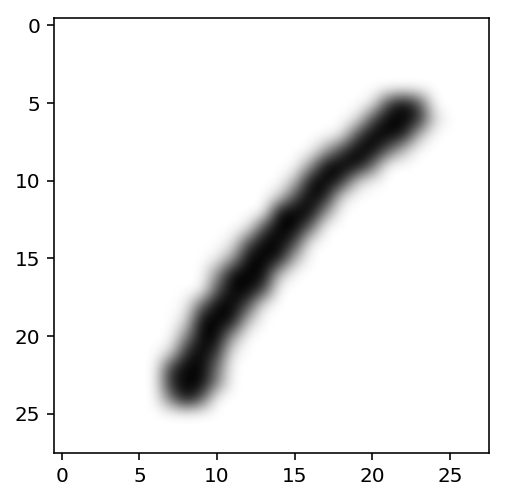

In [27]:
sample_data = next(iter(train_loader))
plot_img(sample_data[0][2])
print(sample_data[0].shape)

In [28]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [29]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

In [30]:
class FeedforwardNetwork(nn.Module):
    def __init__(self):
        super(FeedforwardNetwork, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 200)
        self.fc2 = nn.Linear(200, 200)#
        self.fc3 = nn.Linear(200, 10)
    
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))#
        x = self.fc3(x)
        #return F.log_softmax(x)
        return x

In [31]:
model = FeedforwardNetwork()
model.to(device)
model

FeedforwardNetwork(
  (fc1): Linear(in_features=784, out_features=200, bias=True)
  (fc2): Linear(in_features=200, out_features=200, bias=True)
  (fc3): Linear(in_features=200, out_features=10, bias=True)
)

In [32]:
#Hyperparameters
learning_rate = 0.01
epochs = 8
#Optimizer
optimizer = optim.SGD(model.parameters(), lr=learning_rate)
#Loss criterion
criterion = nn.CrossEntropyLoss()
#criterion = nn.NLLLoss()

### Netz trainieren

In [33]:
for epoch in range(epochs):
    for batch_idx, (data, target) in enumerate(train_loader):
    
        data, target = data.to(device), target.to(device)
        
        # resize data from (batch_size, 1, 28, 28) to (batch_size, 28*28)
        # Data now: (32, 784)
        data = data.view(-1, 28*28)
        
        #Gradienten zurücksetzen
        optimizer.zero_grad()
        #net_out speichert log_softmax des finalen Schrittes
        net_out = model(data) #ruft forward() methode auf
        #loss = Modell-Fehler nach Forward-Pass
        loss = criterion(net_out, target)
        
        #Backpropagation
        loss.backward() #Liefert Gradienten
        
        #Optimizer == SGD --> Ein SGD Step auf aktuellen Parametern
        optimizer.step() #Aktualisiert Parameter
        
        if batch_idx % log_interval == 0:
                print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                    epoch, batch_idx * len(data), len(train_loader.dataset),
                        100. * batch_idx / len(train_loader), loss.data[0]))

Train Epoch: 1	Loss: 2.320149
Train Epoch: 2	Loss: 0.591665
Train Epoch: 3	Loss: 0.509829
Train Epoch: 4	Loss: 0.300025
Train Epoch: 5	Loss: 0.398062
Train Epoch: 6	Loss: 0.330305
Train Epoch: 7	Loss: 0.237217
Train Epoch: 8	Loss: 0.254794


### Netzwerk testen

In [34]:
# run a test loop
test_loss = 0
correct = 0
for data, target in test_loader:
    data, target = data.to(device), target.to(device)
        
    data = data.view(-1, 28 * 28)
    net_out = model(data)
    # sum up batch loss
    test_loss += criterion(net_out, target).data[0]
    pred = net_out.data.max(1)[1]  # get the index of the max log-probability
    correct += pred.eq(target.data).sum()

test_loss /= len(test_loader.dataset)
print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    test_loss, correct, len(test_loader.dataset),
    100. * correct / len(test_loader.dataset)))


Test set: Average loss: 0.0002, Accuracy: 9301/10000 (93%)



In [35]:
#Zugriff auf Modell-Parameter
model_params = model.named_parameters() #oder auf model.parameters()
for m in model_params:
    print(m)

('fc1.weight', Parameter containing:
tensor([[-3.5115e-02,  1.5275e-03, -2.1602e-02,  ..., -2.1478e-02,
         -5.6310e-03, -1.8729e-02],
        [-2.2152e-02, -2.2724e-02,  1.8342e-02,  ...,  3.0049e-02,
         -2.3235e-02, -7.4261e-04],
        [-1.2926e-02, -4.0870e-03,  5.0464e-03,  ..., -2.7199e-02,
          2.3672e-02, -1.2324e-02],
        ...,
        [ 2.3288e-02, -3.1168e-02, -9.9647e-03,  ...,  3.8440e-03,
          1.7200e-02,  1.9373e-02],
        [ 3.8587e-03,  2.3303e-02,  3.9513e-03,  ..., -3.3609e-02,
         -6.5279e-03,  1.0453e-02],
        [-3.1418e-02, -1.7058e-02, -9.9864e-03,  ...,  9.3025e-04,
          1.9738e-02,  1.5909e-03]], device='cuda:0'))
('fc1.bias', Parameter containing:
tensor([-0.0218,  0.0104,  0.0421, -0.0260, -0.0246, -0.0095,  0.0323,
         0.0500,  0.0007, -0.0049, -0.0277,  0.0133,  0.0234, -0.0210,
         0.0120,  0.0323, -0.0274, -0.0436,  0.0405,  0.0169, -0.0174,
         0.0625,  0.0212,  0.0018,  0.0094,  0.0231, -0.0325,  0.

### 4.3 CNN in PyTorch

#### Image Classifier auf der Basis von CIFAR-10 

<img src="cifar10.png">

In Anlehnung an dieser Quelle: https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html

In [36]:
import torch
import torchvision
import torchvision.transforms as transforms

In [37]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True)

trainset

Files already downloaded and verified


Dataset CIFAR10
    Number of datapoints: 50000
    Split: train
    Root Location: ./data
    Transforms (if any): Compose(
                             ToTensor()
                             Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
                         )
    Target Transforms (if any): None

In [38]:
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False)
testset

Files already downloaded and verified


Dataset CIFAR10
    Number of datapoints: 10000
    Split: test
    Root Location: ./data
    Transforms (if any): Compose(
                             ToTensor()
                             Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
                         )
    Target Transforms (if any): None

In [39]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

   ship       cat      frog      bird  


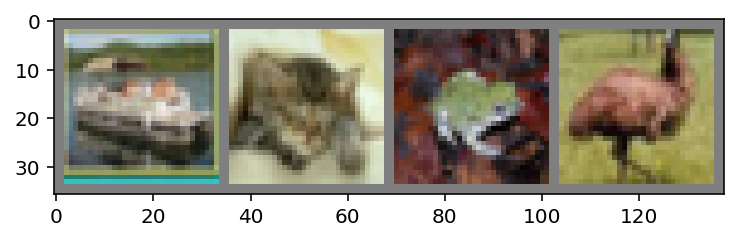

In [46]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    img = img.cpu()
    npimg = img.numpy()
    #print(npimg)
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('  %5s  ' % classes[labels[j]] for j in range(4)))

In [47]:
images.size()

torch.Size([4, 3, 32, 32])

In [61]:
#Netz definieren
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=18, kernel_size=5)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(in_channels=18, out_channels=16, kernel_size=5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        #x = x.to(device)
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [62]:
net = Net()
net.to(device)
print(net)


Net(
  (conv1): Conv2d(3, 18, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(18, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [63]:
#Loss function und Optimizer
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [64]:
#Training
for epoch in range(10):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.187
[1,  4000] loss: 1.796
[1,  6000] loss: 1.599
[1,  8000] loss: 1.513
[1, 10000] loss: 1.453
[1, 12000] loss: 1.405
[2,  2000] loss: 1.313
[2,  4000] loss: 1.304
[2,  6000] loss: 1.236
[2,  8000] loss: 1.222
[2, 10000] loss: 1.215
[2, 12000] loss: 1.198
[3,  2000] loss: 1.077
[3,  4000] loss: 1.121
[3,  6000] loss: 1.085
[3,  8000] loss: 1.086
[3, 10000] loss: 1.082
[3, 12000] loss: 1.048
[4,  2000] loss: 0.987
[4,  4000] loss: 0.966
[4,  6000] loss: 0.983
[4,  8000] loss: 0.964
[4, 10000] loss: 0.981
[4, 12000] loss: 0.973
[5,  2000] loss: 0.884
[5,  4000] loss: 0.909
[5,  6000] loss: 0.916
[5,  8000] loss: 0.893
[5, 10000] loss: 0.927
[5, 12000] loss: 0.891
[6,  2000] loss: 0.841
[6,  4000] loss: 0.830
[6,  6000] loss: 0.836
[6,  8000] loss: 0.857
[6, 10000] loss: 0.855
[6, 12000] loss: 0.849
[7,  2000] loss: 0.757
[7,  4000] loss: 0.801
[7,  6000] loss: 0.792
[7,  8000] loss: 0.815
[7, 10000] loss: 0.822
[7, 12000] loss: 0.818
[8,  2000] loss: 0.741
[8,  4000] 

GroundTruth: 
     cat      ship      ship     plane  


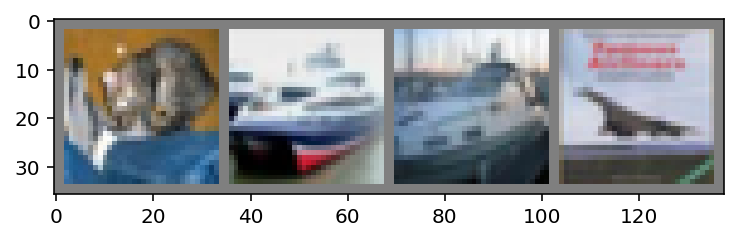

In [65]:
#Testing the network
dataiter = iter(testloader)
images, labels = dataiter.next()
images, labels = images.to(device), labels.to(device)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: \n', ' '.join('  %5s  ' % classes[labels[j]] for j in range(4)))

In [66]:
outputs = net(images)

In [67]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:    cat  ship  ship plane


In [68]:
#How good is the network performance?
correct = 0
total = 0
#Ausschalten fürs Testing
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 68 %


In [69]:
#Which classes performed well?
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 73 %
Accuracy of   car : 83 %
Accuracy of  bird : 52 %
Accuracy of   cat : 46 %
Accuracy of  deer : 68 %
Accuracy of   dog : 53 %
Accuracy of  frog : 73 %
Accuracy of horse : 76 %
Accuracy of  ship : 78 %
Accuracy of truck : 78 %
